In [2]:
# Install Lucid
!pip install --quiet lucid==0.3.1

# Fetch graph definition file
!wget https://hut.lepus.uberspace.de/dv_graph.pb.zip
!unzip dv_graph.pb.zip

--2018-11-29 21:12:44--  https://hut.lepus.uberspace.de/dv_graph.pb.zip
Resolving hut.lepus.uberspace.de (hut.lepus.uberspace.de)... 95.143.172.195, 2001:1a50:11:0:5f:8f:ac:c
Connecting to hut.lepus.uberspace.de (hut.lepus.uberspace.de)|95.143.172.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81167090 (77M) [application/zip]
Saving to: ‘dv_graph.pb.zip’

dv_graph.pb.zip     100%[===================>]  77.41M  8.03MB/s    in 11s     

2018-11-29 21:12:57 (6.82 MB/s) - ‘dv_graph.pb.zip’ saved [81167090/81167090]

Archive:  dv_graph.pb.zip
  inflating: dv_graph.pb             


In [0]:
# Imports

import lucid.optvis.render as render
import lucid.optvis.objectives as objectives
import lucid.optvis.transform as transform
import lucid.misc.io.showing
from lucid.modelzoo.vision_base import Model
from lucid.optvis.param.spatial import naive, fft_image
from lucid.optvis.param.color import to_valid_rgb
import tensorflow as tf
import numpy as np

In [0]:
# Lucid Model

class DeepVariantModel(Model):
    model_path = 'dv_graph.pb'
    image_shape = [100, 221, 6]
    image_value_range = (0, 1)
    input_name = 'shuffle_batch'

# Optimization function

def build_image(w, h=None, batch=None, sd=None, decorrelate=True, fft=True, alpha=False):
    h = h or w
    batch = batch or 1
    channels = 6
    shape = [batch, w, h, channels]
    param_f = fft_image if fft else naive
    t = param_f(shape, sd=sd)
    rgb = to_valid_rgb(t[..., :3], decorrelate=decorrelate, sigmoid=True)
    rgb2 = to_valid_rgb(t[..., :3], decorrelate=decorrelate, sigmoid=True)
    return tf.concat([rgb, rgb2], -1)

param_f = lambda: build_image(100, 221, 64, fft=False, decorrelate=False)
#param_f = lambda: build_image(100, 221, 64, fft=True, decorrelate=True)

# Visualization functions

def channels_to_rgb(channels):
    # Reconstruct the original channels
    channels = channels.transpose([2, 0, 1])
    base = channels[0]
    qual = np.minimum(channels[1], channels[2])
    strand = channels[3]
    alpha = np.multiply(channels[4], channels[5])
    return np.multiply(
        np.stack([base, qual, strand]),
        alpha).transpose([1, 2, 0])

# Monkey-patch lucid's image showing function to deal with 6-channel images

def image(array, domain=None, w=None, format='png'):
    arrays = [channels_to_rgb(array[:, :221, :]), array[:, :221, :1], array[:, :221, 1:2], array[:, :221, 2:3], array[:, :221, 3:4], array[:, :221, 4:5], array[:, :221, 5:]]
    html = ""
    for array in arrays:
        data_url = lucid.misc.io.showing._image_url(array, domain=domain, fmt=format)
        html += '<img src=\"' + data_url + '\">'
    lucid.misc.io.showing._display_html(html)

lucid.misc.io.showing.image = image

In [0]:
# Load the model

deepvariant_model = DeepVariantModel()
deepvariant_model.load_graphdef()

# Channel names

- `InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu`
- `InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu`
- `InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu`
- `InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu`
- `InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu`
- `InceptionV3/InceptionV3/Mixed_5b/concat`
- `InceptionV3/InceptionV3/Mixed_5c/concat`
- `InceptionV3/InceptionV3/Mixed_5d/concat`
- `InceptionV3/InceptionV3/Mixed_6a/concat`
- `InceptionV3/InceptionV3/Mixed_6b/concat`
- `InceptionV3/InceptionV3/Mixed_6c/concat`
- `InceptionV3/InceptionV3/Mixed_6d/concat`
- `InceptionV3/InceptionV3/Mixed_6e/concat`
- `InceptionV3/InceptionV3/Mixed_7a/concat`
- `InceptionV3/InceptionV3/Mixed_7b/concat`
- `InceptionV3/InceptionV3/Mixed_7c/concat`

256 [36.322773 36.322643 36.32321  36.322617 36.32251  36.321426 36.322334
 36.323166 36.323204 36.32198  36.322334 36.32236  36.32251  36.321716
 36.32224  36.32237  36.322212 36.32272  36.32264  36.323345 36.32204
 36.32206  36.3218   36.322174 36.32278  36.32268  36.3215   36.321884
 36.322136 36.32321  36.322247 36.32167  36.322304 36.322044 36.32281
 36.322838 36.322914 36.32227  36.32182  36.32204  36.32192  36.323036
 36.322884 36.322266 36.322136 36.32206  36.32251  36.322536 36.322464
 36.323063 36.322025 36.322117 36.322445 36.32242  36.32384  36.32202
 36.322277 36.322735 36.322407 36.32281  36.32233  36.322716 36.322174
 36.32236 ]



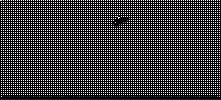
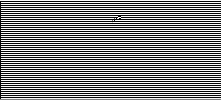
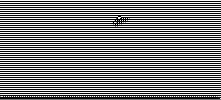
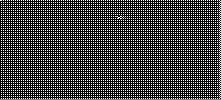
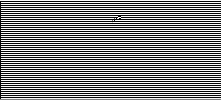
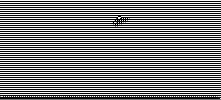
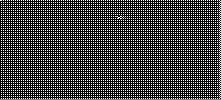

[array([[[[0.96711427, 0.96846104, 0.96807   , 0.96711427, 0.96846104,
           0.96807   ],
          [0.96603376, 0.9681197 , 0.9683561 , 0.96603376, 0.9681197 ,
           0.9683561 ],
          [0.9728804 , 0.9777409 , 0.11154366, 0.9728804 , 0.9777409 ,
           0.11154366],
          ...,
          [0.97739226, 0.9759069 , 0.02021504, 0.97739226, 0.9759069 ,
           0.02021504],
          [0.95805293, 0.9607077 , 0.96096045, 0.95805293, 0.9607077 ,
           0.96096045],
          [0.9605807 , 0.9608178 , 0.0392655 , 0.9605807 , 0.9608178 ,
           0.0392655 ]],
 
         [[0.03161358, 0.03181147, 0.03167124, 0.03161358, 0.03181147,
           0.03167124],
          [0.03174195, 0.03147238, 0.03134602, 0.03174195, 0.03147238,
           0.03134602],
          [0.02154127, 0.02124519, 0.01303074, 0.02154127, 0.02124519,
           0.01303074],
          ...,
          [0.02449149, 0.02474597, 0.20246595, 0.02449149, 0.02474597,
           0.20246595],
          [0.0392

In [26]:
# Render
transforms = []
#jitter = 12
#transforms = [transform.pad(2*jitter), transform.jitter(jitter)]

#objective = objectives.channel("InceptionV3/InceptionV3/Mixed_5b/concat", 0)
#objective = objectives.channel("InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu", 9)
objective = objectives.neuron("InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu", 11, 8, 59)
render.render_vis(deepvariant_model, objective, param_f=param_f, transforms=transforms, thresholds=[256])

256 [33.616146 33.537235 33.533417 33.60517  33.67986  33.66895  33.802063
 33.67076  33.618847 33.354202 33.634575 33.70342  33.55176  33.651516
 33.874138 33.63518  33.84735  33.530743 33.274548 33.355865 33.428177
 33.518475 33.802616 33.5928   33.6209   33.52823  33.78986  33.787037
 33.561234 33.64851  33.783077 33.416683 33.801533 33.668533 33.444363
 33.633747 33.69297  33.461258 33.580177 33.713154 33.86807  33.076912
 33.51085  33.771328 33.470226 33.856228 33.790047 33.524784 33.757065
 33.3227   33.74412  33.875103 33.505936 33.28145  33.35709  33.753967
 33.53587  33.33489  33.477886 33.846783 33.777374 33.714504 33.60255
 33.542206]



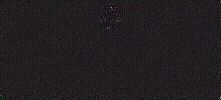
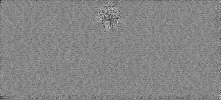
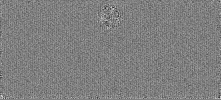
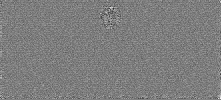
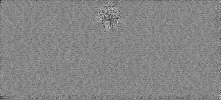
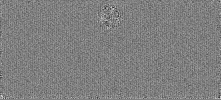
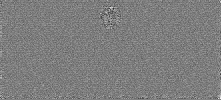

[array([[[[0.17652364, 0.49482232, 0.44633037, 0.17652364, 0.49482232,
           0.44633037],
          [0.36676434, 0.5046989 , 0.57782966, 0.36676434, 0.5046989 ,
           0.57782966],
          [0.46931618, 0.5809338 , 0.49184263, 0.46931618, 0.5809338 ,
           0.49184263],
          ...,
          [0.5022386 , 0.49781772, 0.40533906, 0.5022386 , 0.49781772,
           0.40533906],
          [0.56361926, 0.51776594, 0.6677653 , 0.56361926, 0.51776594,
           0.6677653 ],
          [0.43493235, 0.6709501 , 0.4861028 , 0.43493235, 0.6709501 ,
           0.4861028 ]],
 
         [[0.38102084, 0.64644563, 0.39571473, 0.38102084, 0.64644563,
           0.39571473],
          [0.59930134, 0.54448247, 0.4065369 , 0.59930134, 0.54448247,
           0.4065369 ],
          [0.51695526, 0.43068904, 0.45827198, 0.51695526, 0.43068904,
           0.45827198],
          ...,
          [0.5001149 , 0.45948806, 0.5232913 , 0.5001149 , 0.45948806,
           0.5232913 ],
          [0.5311

In [27]:
objective = objectives.neuron("InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu", 11, 3, 26)
render.render_vis(deepvariant_model, objective, param_f=param_f, transforms=transforms, thresholds=[256])